Installation:
to run gym under windows, instructions are available under 
https://github.com/openai/gym/issues/11
mentioning:
https://github.com/openai/gym/#installing-everything

From the list "install everything" up to now I've not found:
List for OSX:cmake boost boost-python sdl2 swig wget
boost-python sdl2

# Data Exploration #

to understand better our model we will set the state of the car explicitly to zero, and try to climb the mountain directly.


[2017-05-16 13:31:20,153] Making new env: MountainCar-v0


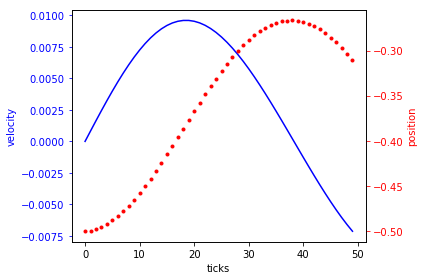

start position:  -0.5 start velocity: 0.0
action: 2
max velocity:  0.00960146032875 reached at position:  -0.386424962715
min velocity:  -0.00713410974565 reached at position:  -0.310841156026
max position:  -0.266735186002 reached with velocity:  0.000200294701523
min position:  -0.5 reached with velocity:  0.0


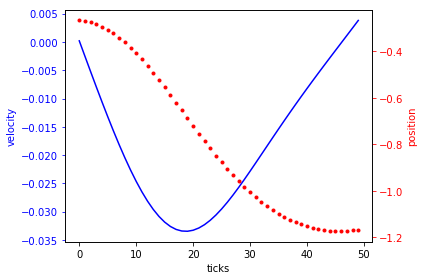

start position:  -0.266735186002 start velocity: 0.0002
action: 0
max velocity:  0.00380666648457 reached at position:  -1.16676036434
min velocity:  -0.033472925539 reached at position:  -0.687665030936
max position:  -0.266735186002 reached with velocity:  0.0002
min position:  -1.174194984 reached with velocity:  -0.00016873327274
Episode finished after 39 timesteps


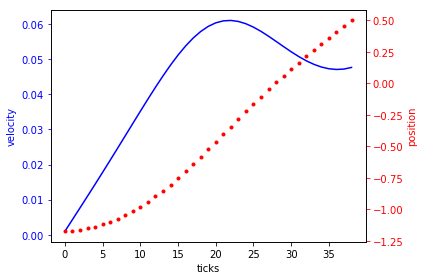

start position:  -1.174194984 start velocity: 0.001
action: 2
max velocity:  0.0610731079555 reached at position:  -0.343027203627
min velocity:  0.001 reached at position:  -1.174194984
max position:  0.498490840355 reached with velocity:  0.0476799927455
min position:  -1.174194984 reached with velocity:  0.001


In [30]:
import gym
import os
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

os.environ["DISPLAY"] = ":0"

directory = "D:/tmp/mcar/"
env = gym.make('MountainCar-v0')
#env = gym.wrappers.Monitor(env, directory, force=True)
maxVel =[-1.2, -0.7]
maxPos =[-1.2, -0.7]
minVel =[0.6, 0.7]
minPos =[0.6, 0.7]
startObservation = [[-0.5, 0.0], [-0.266735186002,0.0002], [-1.174194984, 0.001]]    # position, velocity
actions = [2,0, 2]                       # only uphill
for i_episode in range(3):
    velocity = []
    position = []
    time = []
    maxVel =[-1.2, -0.7]
    maxPos =[-1.2, -0.7]
    minVel =[0.6, 0.7]
    minPos =[0.6, 0.7]
    observation = env.reset()
    env.env.state =startObservation[i_episode]
    observation = env.env.state
    for t in range(50):
        env.render()
        #print(observation)
        velocity.append(observation[1])
        position.append(observation[0])
        if observation[1] > maxVel[1]:
            maxVel = observation
        if observation[1] < minVel[1]:
            minVel = observation
        if observation[0] > maxPos[0]:
            maxPos = observation
        if observation[0] < minPos[0]:
            minPos = observation
        time.append (t)
        action = actions[i_episode] # only up hill
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

    ### plot it..
    fig, ax1 = plt.subplots()
    ax1.plot(time, velocity, 'b-')
    ax1.set_xlabel('ticks')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('velocity', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(time, position, 'r.')
    ax2.set_ylabel('position', color='r')
    ax2.tick_params('y', colors='r')

    fig.tight_layout()
    plt.show()

    print ('start position: ', startObservation[i_episode][0], 'start velocity:', startObservation[i_episode][1])
    print ('action:',actions[i_episode] )
    print ('max velocity: ', maxVel[1], 'reached at position: ', maxVel[0] )
    print ('min velocity: ', minVel[1], 'reached at position: ', minVel[0] )
    print ('max position: ', maxPos[0], 'reached with velocity: ', maxPos[1] )
    print ('min position: ', minPos[0], 'reached with velocity: ', minPos[1] )
